In [21]:
from glob import glob
import os
import subprocess
from PIL import Image
import sys
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import cv2

In [16]:
image_remove_list=glob('../../data/IGNITE/images/he/*_with_context.png')

mask_remove_list=[i.replace('images/','annotations/') for i in image_remove_list]
for i in tqdm(range(len(mask_remove_list))):
    if not os.path.exists(mask_remove_list[i]):
        continue
    os.remove(mask_remove_list[i])
    
for i in tqdm(range(len(image_remove_list))):
    if not os.path.exists(image_remove_list[i]):
        continue
    os.remove(image_remove_list[i])


0it [00:00, ?it/s]
0it [00:00, ?it/s]


In [40]:
image_list=glob('../../data/IGNITE/images/he/*.png')
mask_list=[i.replace('images/','annotations/') for i in image_list]
label_list=[]
for i in tqdm(range(len(mask_list))):
    mask=255-np.array(Image.open(mask_list[i]))
    label_temp=np.unique(mask)
    label_list.append(label_temp)

100%|██████████| 408/408 [00:09<00:00, 42.05it/s]


In [41]:
label_list
    


[array([1, 3, 4, 8], dtype=uint8),
 array([ 0,  3,  8,  9, 10, 12], dtype=uint8),
 array([  0,   1,   2,   3,   4,   8,  12, 255], dtype=uint8),
 array([0, 1, 3, 8], dtype=uint8),
 array([  1,   3,   4,  12, 255], dtype=uint8),
 array([  1,   3,   7,   8,  12, 255], dtype=uint8),
 array([1, 3, 7], dtype=uint8),
 array([ 0,  3,  8,  9, 11], dtype=uint8),
 array([  1,   3,   4,   7,   8,  12, 255], dtype=uint8),
 array([  0,   1,   3,   9, 255], dtype=uint8),
 array([ 0,  1,  3,  4,  7,  8, 12], dtype=uint8),
 array([  0,   8, 255], dtype=uint8),
 array([  0,   1,   3,   6,   7,   8,   9,  11, 255], dtype=uint8),
 array([  0,   1,   3,   5,   7,   8,  12, 255], dtype=uint8),
 array([0, 3], dtype=uint8),
 array([  0,   1,   2,   3,   4,   5,   7,   8,  12, 255], dtype=uint8),
 array([1, 3], dtype=uint8),
 array([  1,   3,   4,  12, 255], dtype=uint8),
 array([ 0,  3,  4,  6,  8, 12], dtype=uint8),
 array([  0,   3,   5,  10,  12, 255], dtype=uint8),
 array([ 0,  3,  5,  7,  8,  9, 10], dt

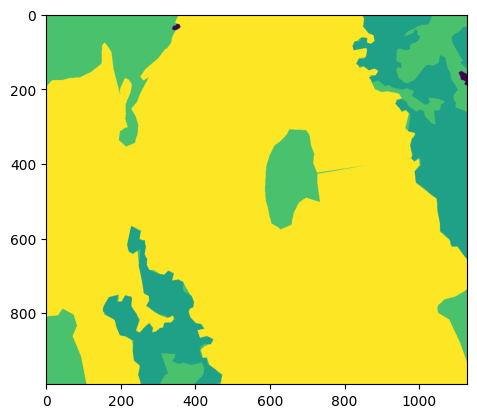

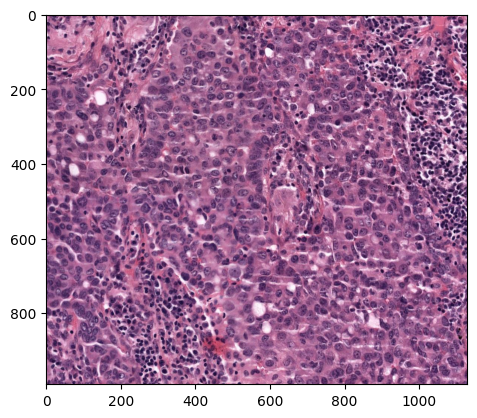

In [57]:
mask=np.array(Image.open(mask_list[0]))
mask[np.where(mask==0)]=255
plt.imshow(mask)
plt.show()
img=Image.open(image_list[0])
plt.imshow(img)
plt.show()

In [58]:
mask

array([[252, 252, 252, ..., 252, 252, 252],
       [252, 252, 252, ..., 252, 252, 252],
       [252, 252, 252, ..., 252, 252, 252],
       ...,
       [252, 252, 252, ..., 254, 254, 254],
       [252, 252, 252, ..., 254, 254, 254],
       [252, 252, 252, ..., 254, 254, 254]], dtype=uint8)